In [2]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense
import numpy as np
from tensorflow import keras
from keras import layers

Q1: Noisy Function

In [3]:
def noisy_function(sample):
    # Split Data
    file_size = int(0.1 * len(sample))
    test_noise = sample[:file_size]
    test_clean = sample[file_size:]

    # Add noise
    nf = 0.3
    size_noise = test_noise.shape
    test_noisy = test_noise + nf*np.random.normal(loc=0.0, scale=1.0, size=size_noise)
    test_noisy = np.clip(test_noisy, 0., 1.)
    x_test_noise1 = np.concatenate([test_noisy, test_clean])
    X_test_noise = x_test_noise1[np.random.permutation(x_test_noise1.shape[0]), :]

    return X_test_noise

Data Processing

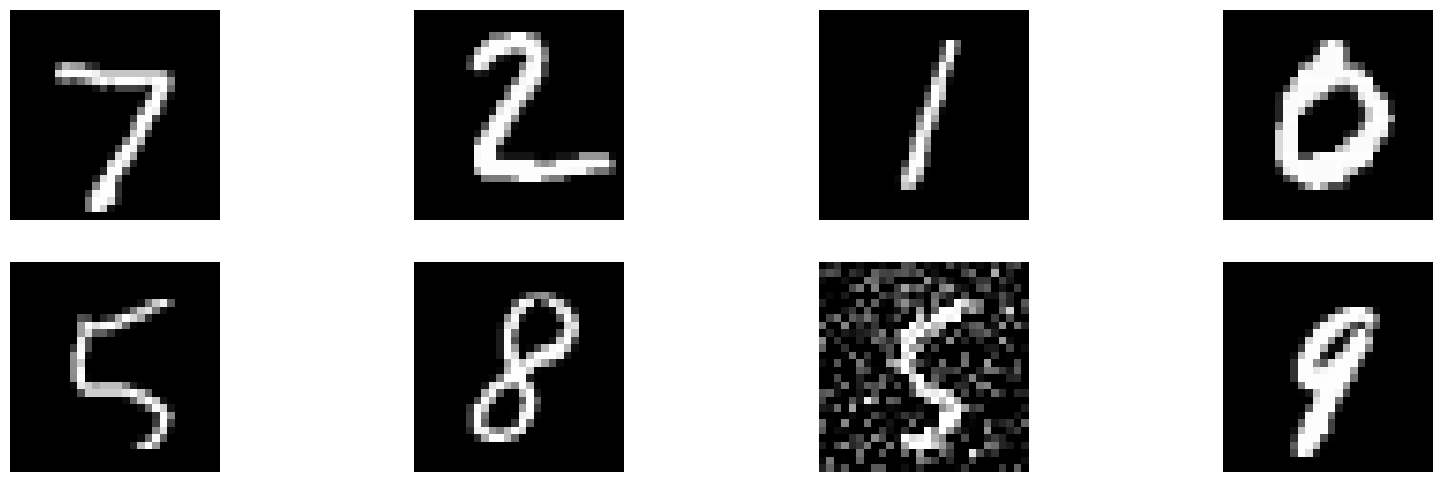

In [211]:
# Import the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train1 = x_train.reshape(x_train.shape[0], 28*28).astype("float32")
x_test1 = x_test.reshape(x_test.shape[0], 28*28).astype("float32")

# Normalization
X_train = x_train1 / 255
X_test = x_test1 / 255

X_train_noisy = noisy_function(X_train)
X_test_noisy = noisy_function(X_test)

n = 4
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    # decoded image
    ax = plt.subplot(2, n, i + 1 + n)
    ax.imshow(X_test_noisy[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()


In [15]:
# Auto Encoder model
input_img = Input(shape=(784,))
encoded = Dense(256, activation="relu")(input_img)
decoded = Dense(784)(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 784)               201488    
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


Apply MSE and SGD

In [16]:
# Import the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train1 = x_train.reshape(x_train.shape[0], 28*28).astype("float32")
x_test1 = x_test.reshape(x_test.shape[0], 28*28).astype("float32")

# Normalization
X_train = x_train1 / 255
X_test = x_test1 / 255

X_train_noisy = noisy_function(X_train)
X_test_noisy = noisy_function(X_test)

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0877 - val_loss: 0.0670
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0642 - val_loss: 0.0619
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0604 - val_loss: 0.0585
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0570 - val_loss: 0.0549
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0535 - val_loss: 0.0513
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0500 - val_loss: 0.0479
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0469 - val_loss: 0.0450
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0442 - val_loss: 0.0426
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0420 - val_loss: 0.0405
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0401 - val_lo

(<matplotlib.legend.Legend at 0x2c85b28e0>,
 None,
 Text(0.5, 0, 'iteration'),
 Text(0, 0.5, 'loss'))

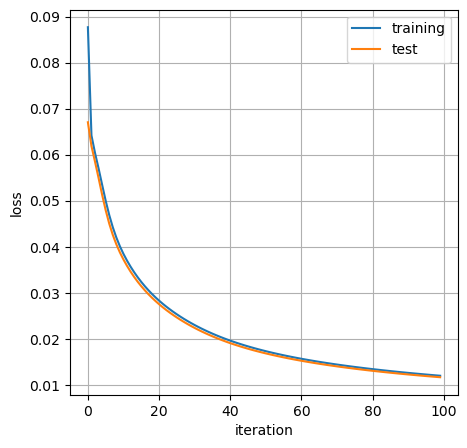

In [17]:
autoencoder.compile(loss=tf.keras.metrics.mean_squared_error, optimizer= tf.keras.optimizers.SGD(learning_rate=0.3))
X_test_noise = noisy_function(X_test)
history21 = autoencoder.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=100, batch_size=256)

_, ax = plt.subplots(figsize=(5,5))
ax.plot(history21.history['loss'], label="training")
ax.plot(history21.history['val_loss'], label="test")
ax.legend(), ax.grid(), ax.set_xlabel("iteration"), ax.set_ylabel("loss")

In [214]:
# Encoder
encoder = Model(input_img, encoded)

Model: "model_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_68 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
Total params: 200,960
Trainable params: 200,960
Non-trainable params: 0
_________________________________________________________________


In [215]:
# Decoder
decoder = Model(encoded, decoded)

Model: "model_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_69 (InputLayer)       [(None, 256)]             0         
                                                                 
 dense_11 (Dense)            (None, 784)               201488    
                                                                 
Total params: 201,488
Trainable params: 201,488
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 0s 525us/step


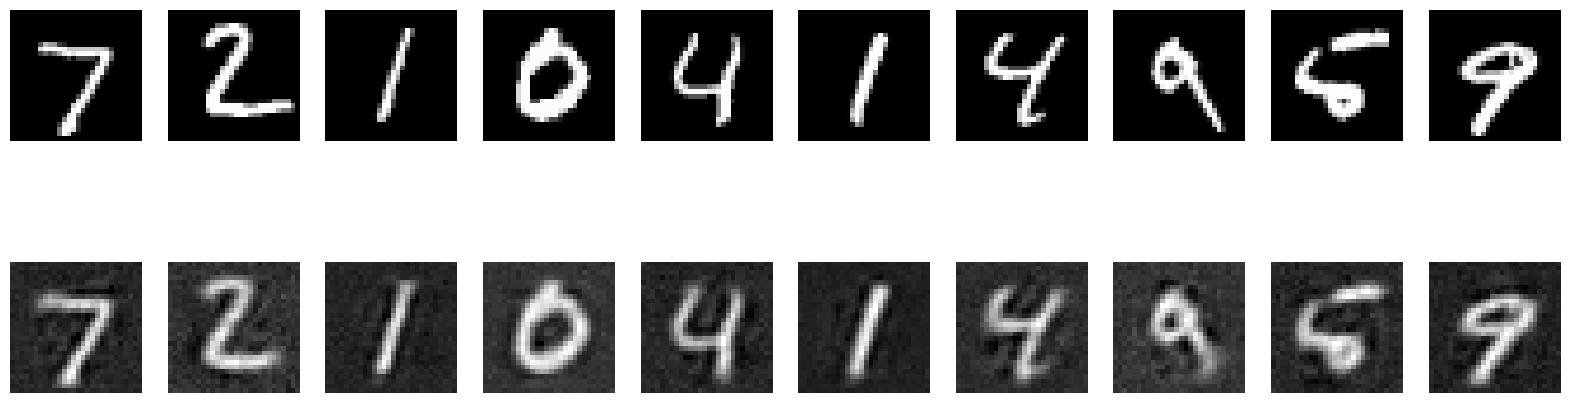

In [233]:
# compress image
encoded_imgs = encoder.predict(X_test)

# decompress image
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    # decoded image
    ax = plt.subplot(2, n, i + 1 + n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()

313/313 [==============================] - 0s 479us/step


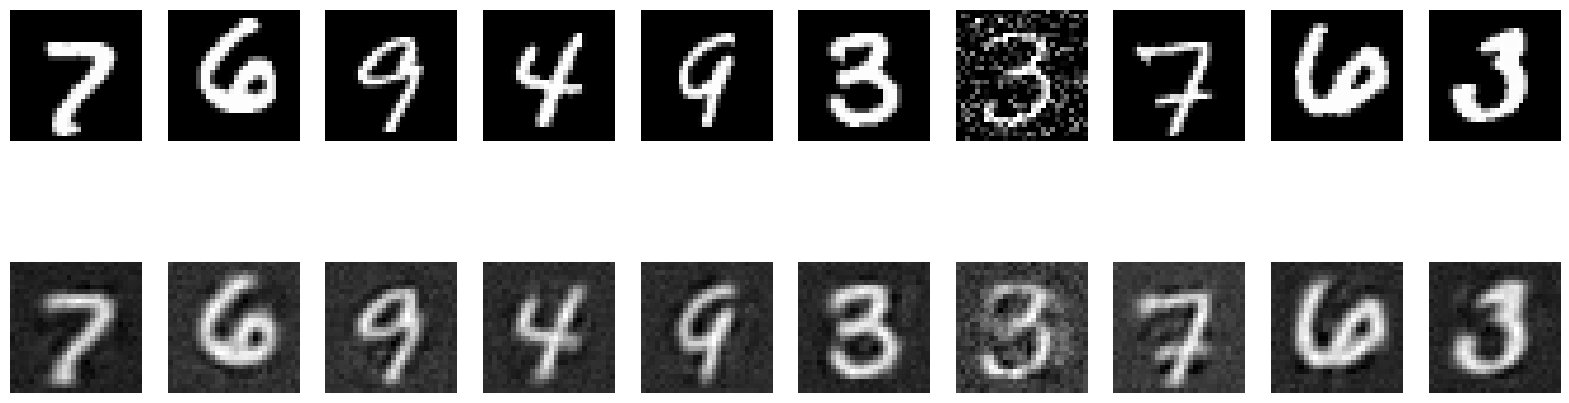

In [234]:
# compress image
encoded_imgs = encoder.predict(X_test_noisy)

# decompress image
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Orinigal
    ax = plt.subplot(2, n, i + 1)
    ax.imshow(X_test_noisy[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    #encoded image

    ax = plt.subplot(2, n, i + 1 + n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()

Q2: the Difference between the original and corrupted image. includes corrupted images only in the testing dataset

In [12]:
# Import the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train1 = x_train.reshape(x_train.shape[0], 28*28).astype("float32")
x_test1 = x_test.reshape(x_test.shape[0], 28*28).astype("float32")

# Normalization
X_train = x_train1 / 255
X_test = x_test1 / 255

X_train_noisy = noisy_function(X_train)
X_test_noisy = noisy_function(X_test)

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0064 - val_loss: 0.1278
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0064 - val_loss: 0.1278
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0064 - val_loss: 0.1278
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0064 - val_loss: 0.1278
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0064 - val_loss: 0.1278
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0064 - val_loss: 0.1278
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0064 - val_loss: 0.1278
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0064 - val_loss: 0.1278
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0064 - val_loss: 0.1278
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0064 - val_lo

(<matplotlib.legend.Legend at 0x2d4d03c70>,
 None,
 Text(0.5, 0, 'iteration'),
 Text(0, 0.5, 'loss'))

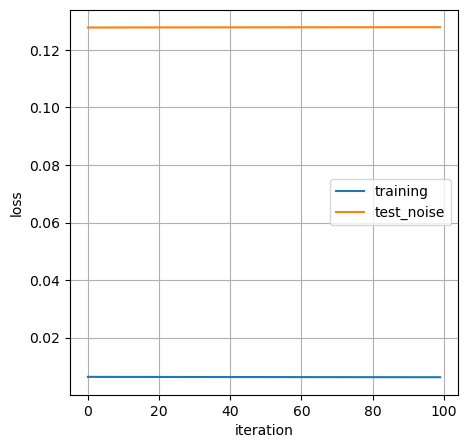

In [19]:
autoencoder.compile(loss=tf.keras.metrics.mean_squared_error, optimizer= tf.keras.optimizers.SGD(learning_rate=0.3))
X_test_noise = noisy_function(X_test)
history21 = autoencoder.fit(X_train, X_train, validation_data=(X_test_noisy, X_test), epochs=100, batch_size=256)

_, ax = plt.subplots(figsize=(5,5))
ax.plot(history21.history['loss'], label="training")
ax.plot(history21.history['val_loss'], label="test_noise")
ax.legend(), ax.grid(), ax.set_xlabel("iteration"), ax.set_ylabel("loss")

Q3: includes corrupted images not only in the testing dataset but also in the training dataset

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0123 - val_loss: 0.0121
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0123 - val_loss: 0.0120
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0122 - val_loss: 0.0120
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0122 - val_loss: 0.0119
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0121 - val_loss: 0.0119
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0121 - val_loss: 0.0119
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0121 - val_loss: 0.0118
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0120 - val_loss: 0.0118
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0120 - val_loss: 0.0118
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0120 - val_lo

(<matplotlib.legend.Legend at 0x2d4b1c9a0>,
 None,
 Text(0.5, 0, 'iteration'),
 Text(0, 0.5, 'loss'))

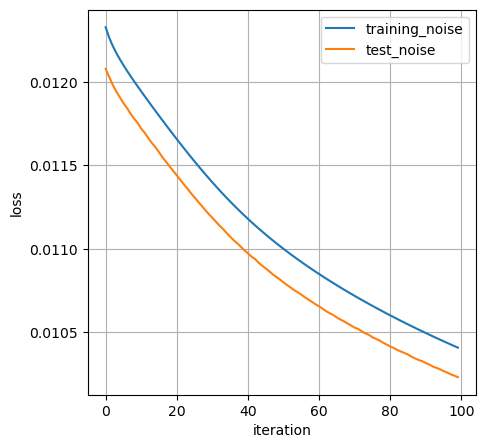

In [14]:
autoencoder.compile(loss=tf.keras.metrics.mean_squared_error, optimizer= tf.keras.optimizers.SGD(learning_rate=0.3))
X_train_noise = noisy_function(X_train)
X_test_noise = noisy_function(X_test)
history21 = autoencoder.fit(X_train_noise, X_train_noise, validation_data=(X_test_noise, X_test_noise), epochs=100, batch_size=256)

_, ax = plt.subplots(figsize=(5,5))
ax.plot(history21.history['loss'], label="training_noise")
ax.plot(history21.history['val_loss'], label="test_noise")
ax.legend(), ax.grid(), ax.set_xlabel("iteration"), ax.set_ylabel("loss")

Q4: Change the loss function of MSE with SSIM loss function. No SSIM loss function.

In [248]:
autoencoder.compile(loss=tf.image.ssim_multiscale, optimizer= tf.keras.optimizers.SGD(learning_rate=0.23))
history21 = autoencoder.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=100, batch_size=128)

_, ax = plt.subplots(figsize=(5,5))
ax.plot(history21.history['loss'], label="training")
ax.plot(history21.history['val_loss'], label="test")
ax.legend(), ax.grid(), ax.set_xlabel("iteration"), ax.set_ylabel("loss")

Epoch 1/100


TypeError: in user code:

    File "/opt/homebrew/Caskroom/miniforge/base/envs/5XSL0/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/5XSL0/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/Caskroom/miniforge/base/envs/5XSL0/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/5XSL0/lib/python3.8/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/5XSL0/lib/python3.8/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/opt/homebrew/Caskroom/miniforge/base/envs/5XSL0/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/5XSL0/lib/python3.8/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/5XSL0/lib/python3.8/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: Missing required positional argument


Q5: Complex autoencoder

In [235]:
# Auto Encoder model
input_img = Input(shape=(784,))
relu1 = Dense(512, activation="relu")(input_img)
comp_encoder = Dense(256, activation="sigmoid")(relu1)

relu2 = Dense(512, activation="relu")(comp_encoder)
comp_decoder = Dense(784)(relu2)

autoencoder1 = Model(input_img, comp_decoder)
autoencoder1.summary()

Model: "model_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_70 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 512)               131584    
                                                                 
 dense_15 (Dense)            (None, 784)               402192    
                                                                 
Total params: 1,067,024
Trainable params: 1,067,024
Non-trainable params: 0
_________________________________________________________________


In [242]:
# Import the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train1 = x_train.reshape(x_train.shape[0], 28*28).astype("float32")
x_test1 = x_test.reshape(x_test.shape[0], 28*28).astype("float32")

X_train = x_train1 / 255
X_train_nois = noisy_function(X_train)
X_test = x_test1 / 255
X_test_nois = noisy_function(X_test)

Epoch 1/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0713 - val_loss: 0.0662
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0651 - val_loss: 0.0643
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0632 - val_loss: 0.0620
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0606 - val_loss: 0.0591
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0575 - val_loss: 0.0557
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0542 - val_loss: 0.0523
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0509 - val_loss: 0.0490
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0479 - val_loss: 0.0462
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0454 - val_loss: 0.0439
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0433 - val_lo

(<matplotlib.legend.Legend at 0x35b3678e0>,
 None,
 Text(0.5, 0, 'iteration'),
 Text(0, 0.5, 'loss'))

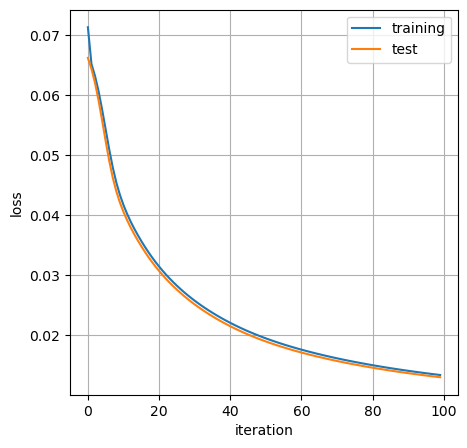

In [238]:
autoencoder1.compile(loss=tf.keras.metrics.mean_squared_error, optimizer = tf.keras.optimizers.SGD(learning_rate=0.4))
history22 = autoencoder1.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=100, batch_size=256)

_, ax = plt.subplots(figsize=(5,5))
ax.plot(history22.history['loss'], label="training")
ax.plot(history22.history['val_loss'], label="test")
ax.legend(), ax.grid(), ax.set_xlabel("iteration"), ax.set_ylabel("loss")


Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0132 - val_loss: 0.1189
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0132 - val_loss: 0.1190
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0131 - val_loss: 0.1191
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0130 - val_loss: 0.1192
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0129 - val_loss: 0.1192
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0129 - val_loss: 0.1193
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0128 - val_loss: 0.1194
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0128 - val_loss: 0.1195
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0127 - val_loss: 0.1195
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0126 - val_lo

(<matplotlib.legend.Legend at 0x2d5678250>,
 None,
 Text(0.5, 0, 'iteration'),
 Text(0, 0.5, 'loss'))

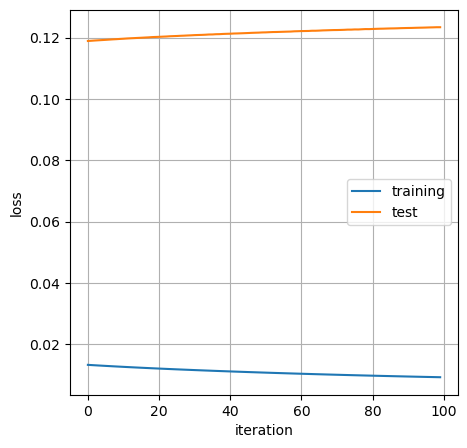

In [243]:
#Training with noisy testing data
history221 = autoencoder1.fit(X_train, X_train, validation_data=(X_test_nois, X_test), epochs=100, batch_size=256)

_, ax = plt.subplots(figsize=(5,5))
ax.plot(history221.history['loss'], label="training")
ax.plot(history221.history['val_loss'], label="test")
ax.legend(), ax.grid(), ax.set_xlabel("iteration"), ax.set_ylabel("loss")

In [239]:
#More Complex Encoder
complex_encoder = Model(input_img, comp_encoder)

Model: "model_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_70 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
Total params: 533,248
Trainable params: 533,248
Non-trainable params: 0
_________________________________________________________________


In [240]:
#More Complex Decoder
complex_decoder = Model(comp_encoder, comp_decoder)

Model: "model_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_71 (InputLayer)       [(None, 256)]             0         
                                                                 
 dense_14 (Dense)            (None, 512)               131584    
                                                                 
 dense_15 (Dense)            (None, 784)               402192    
                                                                 
Total params: 533,776
Trainable params: 533,776
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 0s 956us/step


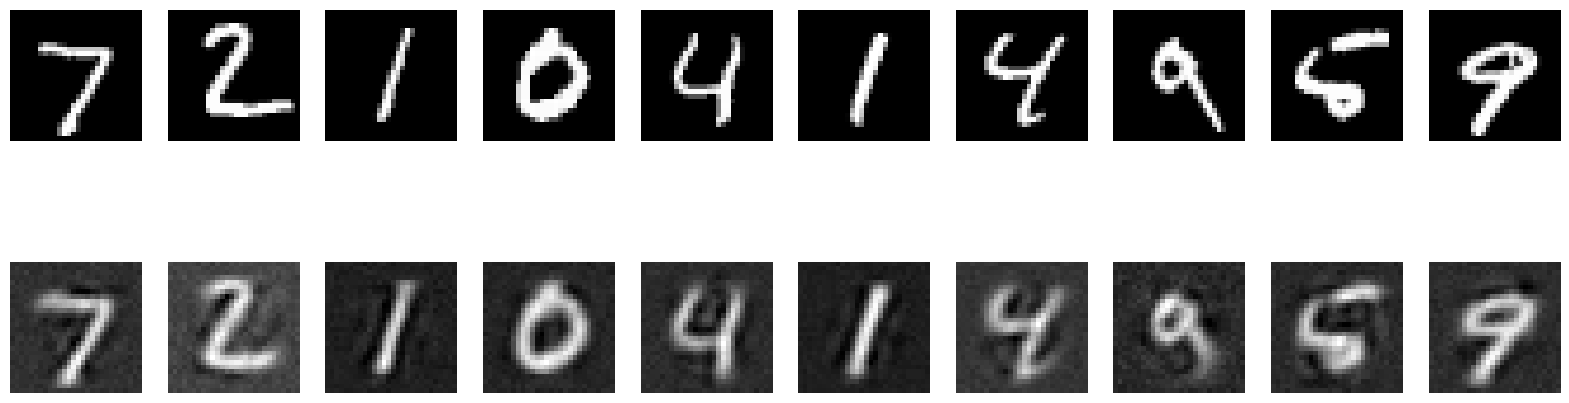

In [241]:
# compress image
encoded_imgs = complex_encoder.predict(X_test)

# decompress image
decoded_imgs = complex_decoder.predict(encoded_imgs)


n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Orinigal
    ax = plt.subplot(2, n, i + 1)
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    # decoded image
    ax = plt.subplot(2, n, i + 1 + n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()

Q6: Convolutional Autoencoder

In [32]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder2 = tf.keras.models.Model(input_img, decoded)
autoencoder2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 32)          9248

In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train_a = x_train.astype('float32') / 255
X_test_a = x_test.astype('float32') / 255
X_train_conv = np.reshape(X_train_a, (len(X_train_a), 28, 28, 1))
X_test_conv = np.reshape(X_test_a, (len(X_test_a), 28, 28, 1))
X_train_conv_noisy = noisy_function(X_train_conv)
X_test_conv_noisy = noisy_function(X_test_conv)

autoencoder2.compile(loss=tf.keras.metrics.mean_squared_error,
                     optimizer= tf.keras.optimizers.SGD(learning_rate=0.3))

Epoch 1/25
235/235 [==============================] - 14s 58ms/step - loss: 0.0460 - false_positives: 14769438.0000 - true_negatives: 23276400.0000 - false_negatives: 74755.0000 - true_positives: 8919401.0000 - precision: 0.3765 - recall: 0.9917 - val_loss: 0.0214 - val_false_positives: 835709.0000 - val_true_negatives: 5493072.0000 - val_false_negatives: 10609.0000 - val_true_positives: 1500610.0000 - val_precision: 0.6423 - val_recall: 0.9930
Epoch 2/25
235/235 [==============================] - 14s 58ms/step - loss: 0.0179 - false_positives: 3277502.0000 - true_negatives: 34768336.0000 - false_negatives: 168033.0000 - true_positives: 8826123.0000 - precision: 0.7292 - recall: 0.9813 - val_loss: 0.0148 - val_false_positives: 304625.0000 - val_true_negatives: 6024156.0000 - val_false_negatives: 51854.0000 - val_true_positives: 1459365.0000 - val_precision: 0.8273 - val_recall: 0.9657
Epoch 3/25
235/235 [==============================] - 13s 57ms/step - loss: 0.0132 - false_positives: 

(<matplotlib.legend.Legend at 0x29cbbb3a0>,
 None,
 Text(0.5, 0, 'iteration'),
 Text(0, 0.5, 'loss'))

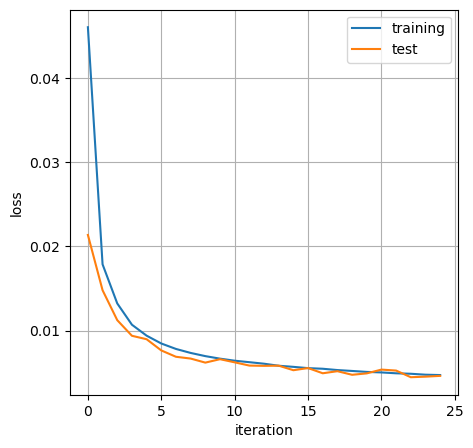

In [34]:
autoencoder2.compile(loss=tf.keras.metrics.mean_squared_error,
                     optimizer= tf.keras.optimizers.SGD(learning_rate=0.3),
                     metrics=[
                        tf.keras.metrics.FalsePositives(thresholds=0.04),
                        tf.keras.metrics.TrueNegatives(thresholds=0.04),
                        tf.keras.metrics.FalseNegatives(thresholds=0.04),
                        tf.keras.metrics.TruePositives(thresholds=0.04),
                        tf.keras.metrics.Precision(thresholds=0.04),
                        tf.keras.metrics.Recall(thresholds=0.04)
                    ]
                     )
history23 = autoencoder2.fit(X_train_conv, X_train_conv, validation_data=(X_test_conv, X_test_conv), epochs=25, batch_size=256)

_, ax = plt.subplots(figsize=(5,5))
ax.plot(history23.history['loss'], label="training")
ax.plot(history23.history['val_loss'], label="test")
ax.legend(), ax.grid(), ax.set_xlabel("iteration"), ax.set_ylabel("loss")

Epoch 1/25
235/235 [==============================] - 14s 59ms/step - loss: 0.0765 - false_positives_5: 16034240.0000 - true_negatives_4: 22011598.0000 - false_negatives_4: 848858.0000 - true_positives_4: 8145298.0000 - precision_4: 0.3369 - recall_6: 0.9056 - val_loss: 0.0724 - val_false_positives_5: 2597756.0000 - val_true_negatives_4: 3731025.0000 - val_false_negatives_4: 49724.0000 - val_true_positives_4: 1461495.0000 - val_precision_4: 0.3600 - val_recall_6: 0.9671
Epoch 2/25
235/235 [==============================] - 14s 59ms/step - loss: 0.0706 - false_positives_5: 15492600.0000 - true_negatives_4: 22553248.0000 - false_negatives_4: 258074.0000 - true_positives_4: 8736082.0000 - precision_4: 0.3606 - recall_6: 0.9713 - val_loss: 0.0704 - val_false_positives_5: 2300604.0000 - val_true_negatives_4: 4028177.0000 - val_false_negatives_4: 51499.0000 - val_true_positives_4: 1459720.0000 - val_precision_4: 0.3882 - val_recall_6: 0.9659
Epoch 3/25
235/235 [==============================

(<matplotlib.legend.Legend at 0x2bd15f160>,
 None,
 Text(0.5, 0, 'iteration'),
 Text(0, 0.5, 'loss'))

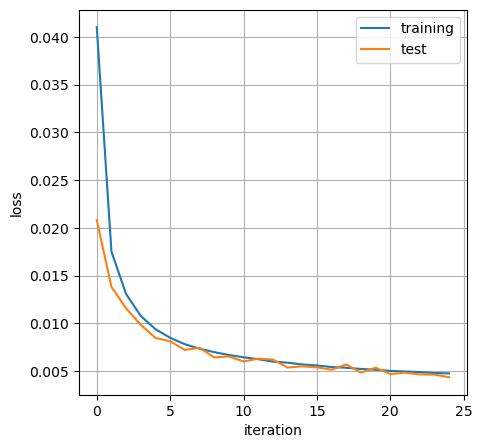

In [307]:
history24 = autoencoder2.fit(X_train_conv_noisy, X_train_conv, validation_data=(X_test_conv_noisy, X_test_conv), epochs=25, batch_size=256)

_, ax = plt.subplots(figsize=(5,5))
ax.plot(history24.history['loss'], label="training")
ax.plot(history24.history['val_loss'], label="test")
ax.legend(), ax.grid(), ax.set_xlabel("iteration"), ax.set_ylabel("loss")

In [300]:
#Convolutional encoder
conv_encoder = Model(input_img, encoded)

In [301]:
#Convolutional decoder
conv_decoder = Model(x, decoded)

1875/1875 [==============================] - 9s 5ms/step


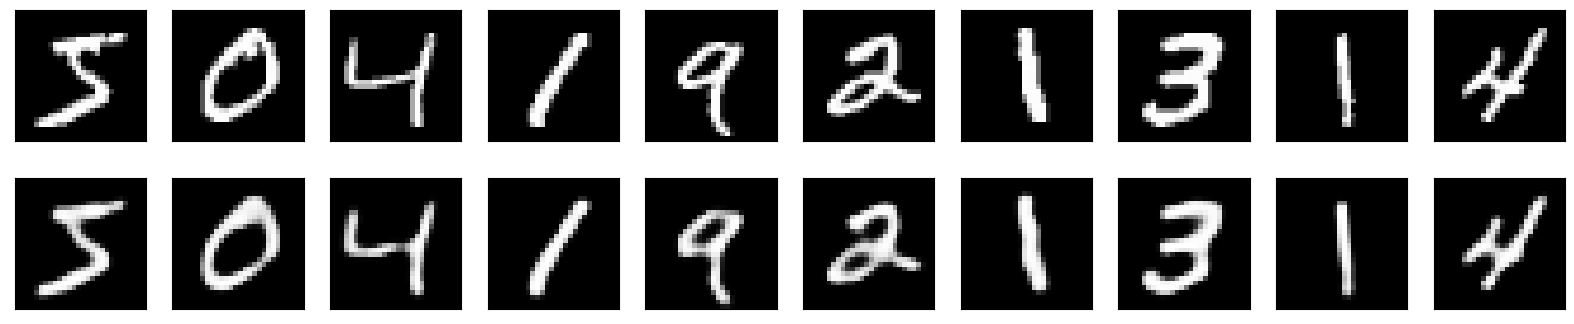

In [306]:
# Let's see how it did
decoded_imgs = autoencoder2.predict(X_train_conv)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Q8: loss distribution

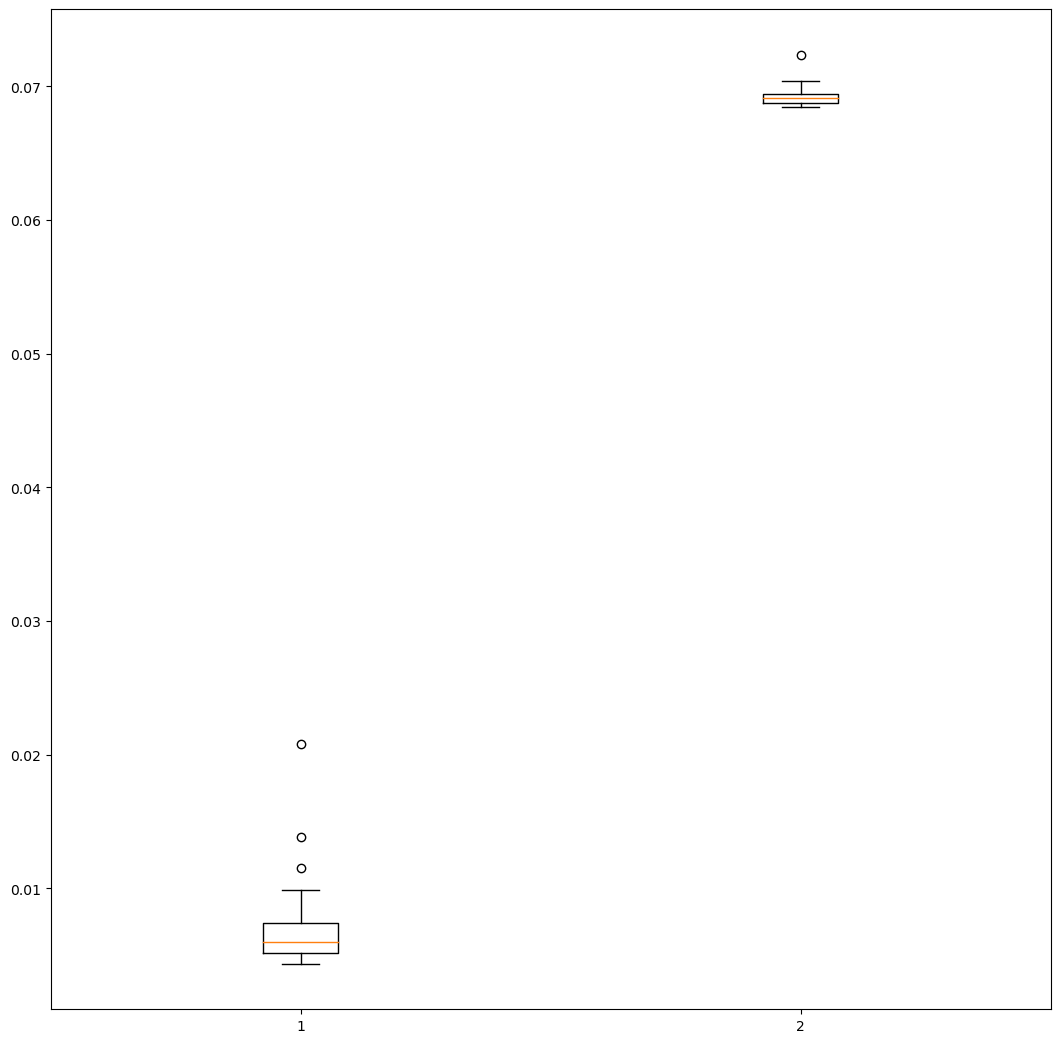

In [308]:
np.random.seed(10)
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)

data1 = history23.history['val_loss']
data2 = history24.history['val_loss']
data = [data1, data2]
fig = plt.figure(figsize =(10, 10))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

Q9: TP, TN, FP, FN

In [28]:
history24 = autoencoder2.fit(X_train_conv, X_train_conv, validation_data=(X_test_conv_noisy, X_test_conv), epochs=25, batch_size=256)


Epoch 1/25
235/235 [==============================] - 14s 59ms/step - loss: 0.0863 - val_loss: 0.0744
Epoch 2/25
235/235 [==============================] - 14s 60ms/step - loss: 0.0730 - val_loss: 0.0722
Epoch 3/25
235/235 [==============================] - 13s 56ms/step - loss: 0.0710 - val_loss: 0.0705
Epoch 4/25
235/235 [==============================] - 13s 56ms/step - loss: 0.0701 - val_loss: 0.0700
Epoch 5/25
235/235 [==============================] - 13s 57ms/step - loss: 0.0698 - val_loss: 0.0699
Epoch 6/25
235/235 [==============================] - 13s 57ms/step - loss: 0.0696 - val_loss: 0.0698
Epoch 7/25
235/235 [==============================] - 13s 57ms/step - loss: 0.0693 - val_loss: 0.0695
Epoch 8/25
235/235 [==============================] - 14s 58ms/step - loss: 0.0691 - val_loss: 0.0692
Epoch 9/25
235/235 [==============================] - 13s 57ms/step - loss: 0.0689 - val_loss: 0.0692
Epoch 10/25
235/235 [==============================] - 14s 59ms/step - loss: 0.068

(<matplotlib.legend.Legend at 0x2bf9b1670>,
 None,
 Text(0.5, 0, 'iteration'),
 Text(0, 0.5, 'loss'))

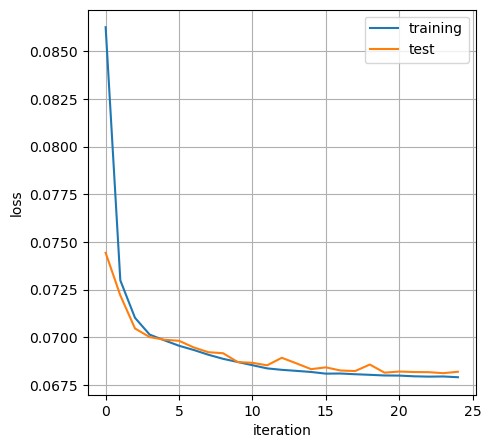

In [30]:
_, ax = plt.subplots(figsize=(5,5))
ax.plot(history24.history['loss'], label="training")
ax.plot(history24.history['val_loss'], label="test")
ax.legend(), ax.grid(), ax.set_xlabel("iteration"), ax.set_ylabel("loss")

313/313 [==============================] - 2s 6ms/step
(10000, 28, 28, 1)
(10000, 28, 28, 1)


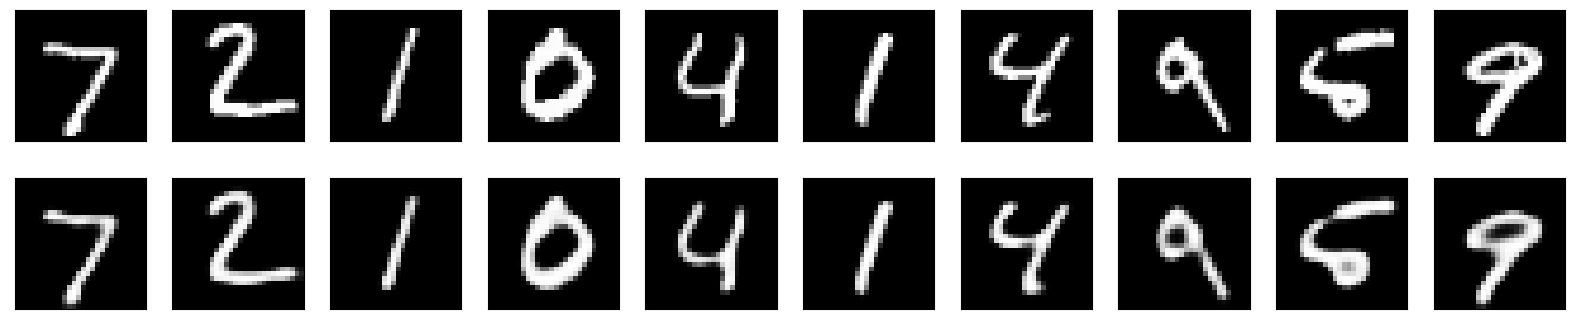

In [37]:
test_predictions = autoencoder2.predict(X_test_conv)
print(test_predictions.shape)
print(X_test_conv_noisy.shape)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [322]:
Total = (history23.history['val_false_positives_5'][-1] + history23.history['val_true_negatives_4'][-1] + history23.history['val_false_negatives_4'][-1] + history23.history['val_true_positives_4'][-1])

Rate = Total/(784*784*10000)

FP = int(history23.history['val_false_positives_5'][-1]*Rate)
TN = int(history23.history['val_true_negatives_4'][-1]*Rate)
FN = int(history23.history['val_false_negatives_4'][-1]*Rate)
TP = int(history23.history['val_true_positives_4'][-1]*Rate)
Precision = history23.history['val_precision_4'][-1]
Recall = history23.history['val_recall_6'][-1]
print("FP:", FP)
print("TN:", TN)
print("FN:", FN)
print("TP:", TP)

print("Precision:", Precision)
print("Recall:", Recall)


FP: 148
TN: 7923
FN: 83
TP: 1844
Precision: 0.9254522919654846
Recall: 0.9567263126373291


Q10: Precision & Recall & F1 Score

In [5]:
FP = 148
TN = 7923
FN = 83
TP = 1844

Precision_n = TP / (TP + FP)
Recall_n = TP / (TP + FN)
F1_Score = 2*((Precision_n*Recall_n)/(Precision_n+Recall_n))

print("Precision:", Precision_n)
print("Recall:", Recall_n)
print("F1 Score:", F1_Score)

Precision: 0.9257028112449799
Recall: 0.956927867151012
F1 Score: 0.9410563919367186


Q11: ROC and AUC

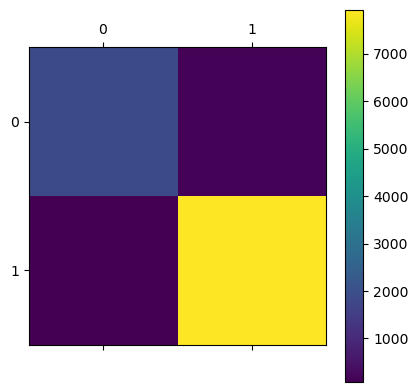

In [1]:
import numpy as np
import matplotlib.pyplot as plt

FP = 148
TN = 7923
FN = 83
TP = 1844

plt.matshow(np.array([[TP, FP],[FN, TN]]))
plt.colorbar()
plt.show()

Q12: False Alarm Rate

In [2]:
FAR = FP/(FP+TN)

print("FAR:", FAR)

FAR: 0.01833725684549622
